# CETM47 - Assignment 2
## Student Name: Agboola Abiola Abigial
## Student Code: 229256617 

In [1]:
import pandas as pd
import json
from pandas.io.json import json_normalize
import tweepy
import textblob
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from wordcloud import WordCloud
import numpy as np
import re
import os
import string
import pip
import preprocessor as p
import nltk
from nltk.stem import PorterStemmer, LancasterStemmer # Common stemmers
from nltk.stem import WordNetLemmatizer # Common Lemmatizer
nltk.download('wordnet')
from nltk.corpus import wordnet
from nltk import word_tokenize
from nltk.corpus import stopwords
from transformers import pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split 
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix #The classification report visualizer displays the precision,
                                                            #recall, F1, and support scores for any model i want to use.
from sklearn.metrics import accuracy_score, precision_score, mean_squared_error, r2_score
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron
from nltk import ngrams
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('vader_lexicon')

plt.style.use('ggplot')
#installing tweet-preprocessor, wordcloud
pip.main(['install','tweet-preprocessor']) # function simplified the data preprocessing step by automatically removing
                                            #Twitter-specific features such as @ and # symbols, and 
pip.main(['install','wordcloud'])

C:\Users\itele uk\anaconda3\lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
[nltk_data] Downloading package wordnet to C:\Users\itele
[nltk_data]     uk\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\itele
[nltk_data]     uk\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\itele uk\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to C:\Users\itele
[nltk_data]     uk\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to C:\Users\itele
[nltk_data]     uk\AppData\Roaming\nltk_data...
[nltk_d

Requirement already satisfied: tweet-preprocessor in c:\users\itele uk\anaconda3\lib\site-packages (0.6.0)

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


Requirement already satisfied: wordcloud in c:\users\itele uk\anaconda3\lib\site-packages (1.9.1.1)

Requirement already satisfied: numpy>=1.6.1 in c:\users\itele uk\anaconda3\lib\site-packages (from wordcloud) (1.23.5)

Requirement already satisfied: matplotlib in c:\users\itele uk\anaconda3\lib\site-packages (from wordcloud) (3.7.0)

Requirement already satisfied: pillow in c:\users\itele uk\anaconda3\lib\site-packages (from wordcloud) (9.4.0)

Requirement already satisfied: fonttools>=4.22.0 in c:\users\itele uk\anaconda3\lib\site-packages (from matplotlib->wordcloud) (4.25.0)

Requirement already satisfied: pyparsing>=2.3.1 in c:\users\itele uk\anaconda3\lib\site-packages (from matplotlib->wordcloud) (3.0.9)

Requirement already satisfied: kiwisolver>=1.0.1 in c:\users\itele uk\anaconda3\lib\site-packages (from matplotlib->wordcloud) (1.4.4)

Requirement already satisfied: python-dateutil>=2.7 in c:\users\itele uk\anaconda3\lib\site-packages (from matplotlib->wordcloud) (2.8.2)

Requirement already satisfied: packaging>=20.0 in c:\users\itele uk\anaconda3\lib\site-packages (from matplotlib->wordcloud) (22.0)

Requirement already satisfied: contourpy>=1.0.1 in c:\users\itele uk\anaconda3\lib\site-packages (from matplotlib->wordcloud) (1.0.5)

Requirement already satisfied: cycler>=0.10 in c:\users\itele uk\anaconda3\lib\site-packages (from matplotlib->wordcloud) (0.11.0)

Requirement already satisfied: six>=1.5 in c:\users\itele uk\anaconda3\lib\site-packages (from python-dateutil>=2.7->matplotlib->wordcloud) (1.16.0)

0

## Review my Data

In [2]:
tweets_data = pd.read_json("C:/Users/itele uk/Downloads/cetm47/cetm47-AS2-Data.json", orient='records')
tweets_data.keys()
print(tweets_data.shape)
print(tweets_data)
tweets_data.head()
tweets_data.isnull().sum()

# Check the data types of the variables
tweets_data.dtypes

(6443, 5)
                                                   text       date  label  \
0     The {@Clinton LumberKings@} beat the {@Cedar R... 2019-09-08      4   
1     I would rather hear Eli Gold announce this Aub... 2019-09-08      4   
2     Someone take my phone away, I’m trying to not ... 2019-09-08      4   
3     A year ago, Louisville struggled to beat an FC... 2019-09-08      4   
4     Anyone know why the #Dodgers #Orioles game nex... 2019-09-08      4   
...                                                 ...        ...    ...   
6438  Praying for {{USERNAME}} family friends riding... 2021-08-29      3   
6439  Etsy: {{USERNAME}} Hi there, I m sorry to hear... 2021-08-29      1   
6440  Imagine how hard it is to be a Teume. Everyone... 2021-08-29      2   
6441  Ride With Me - Mental Health Awareness Charity... 2021-08-29      2   
6442  Prediction: The future of CX in {@McKinsey Com... 2021-08-29      1   

                       id                label_name  
0     11705

text                  object
date          datetime64[ns]
label                  int64
id                     int64
label_name            object
dtype: object

### I further want to get the idea of how my dataset looks like, to show the number of times a label occurs
#### and from the plot i can see that most label was two, which shows that the data is unbalanced, and the target class has an uneven distribution of data.

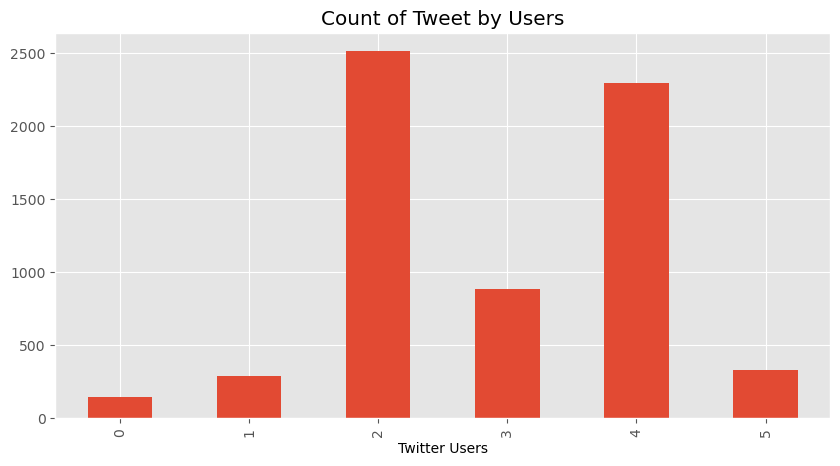

In [3]:
## Quick EDA
ass = tweets_data['label'].value_counts().sort_index() \
    .plot(kind='bar', 
          title='Count of Tweet by Users',
          figsize=(10, 5))
ass.set_xlabel('Twitter Users')
plt.show()

### Data Preprocessing and Preparation Using NLP Pipeline

In [4]:
REPLACE_NO_SPACE = re. compile("(\.)|(\;)|(\:)|(\!)|(\')|(\?)|(\,)|(\")|(\|)|(\()|(\))|(\[)|(\])|(\%)|(\$)|(\>)|(\<)|(\{)|(\})")
REPLACE_WITH_SPACE = re.compile("(<br\s/><br\s/?)|(-)|(/)|(:).")

In [5]:
def clean_my_ass2_dataset(tweets_txt):
    cleaned = []
    for line in tweets_txt:
        #send to tweet processor
        tweet = p.clean(line)
        #remove puntuation
        tweet = REPLACE_NO_SPACE.sub('', tweet.lower()) # convert all tweets to lower cases
        tweet = REPLACE_WITH_SPACE.sub('', tweet)
        cleaned.append(tweet)
    return cleaned

In [6]:
# clean data
cln_data = clean_my_ass2_dataset(tweets_data["text"])
cln_data = pd.DataFrame(cln_data)

#append cleaned tweets to the tweet_data
tweets_data["cleaned_text"] = cln_data

# i want to compare the cleaned data to the uncleaned data
tweets_data.head(4) #view first 4 rows
tweets_data.tail(4) #view last 4 rows
print(tweets_data)

                                                   text       date  label  \
0     The {@Clinton LumberKings@} beat the {@Cedar R... 2019-09-08      4   
1     I would rather hear Eli Gold announce this Aub... 2019-09-08      4   
2     Someone take my phone away, I’m trying to not ... 2019-09-08      4   
3     A year ago, Louisville struggled to beat an FC... 2019-09-08      4   
4     Anyone know why the #Dodgers #Orioles game nex... 2019-09-08      4   
...                                                 ...        ...    ...   
6438  Praying for {{USERNAME}} family friends riding... 2021-08-29      3   
6439  Etsy: {{USERNAME}} Hi there, I m sorry to hear... 2021-08-29      1   
6440  Imagine how hard it is to be a Teume. Everyone... 2021-08-29      2   
6441  Ride With Me - Mental Health Awareness Charity... 2021-08-29      2   
6442  Prediction: The future of CX in {@McKinsey Com... 2021-08-29      1   

                       id                label_name  \
0     11705163244198

### Word Cloud is used to display the most prominent words in a body of text in my data

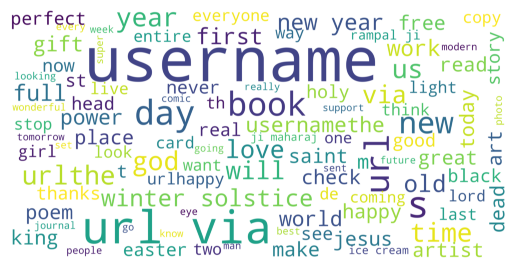

In [7]:
word_cloud_text = ''.join([text for text in tweets_data['cleaned_text'][tweets_data['label']==0]])

wordcloud = WordCloud(max_font_size=100, max_words=100, background_color="white", scale=10, width=800, height=400).generate(word_cloud_text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Text Nomalization -  using stemmer and lemmer on my cleaned text to reduce words to their basic form  which makes it easier to identify  and analyzed patterns and relationships between words. and also for easy comparism

In [8]:
## Basic NLTK
#to split paragraphs and sentences into smaller units that can be more easily assigned meaning
tokenize_tweet = tweets_data["cleaned_text"].apply(lambda x:x.split())

# Initialize a stemmer object
#Stemming is the process of reducing a word to its stem that affixes to suffixes and prefixes or to the roots of words 
stemmer = PorterStemmer()
tokenized_tweet_stem = tokenize_tweet.apply(lambda x: [stemmer.stem(i) for i in x])

# Initialize a lemmatizer object
#grouping different inflected forms of words into the root form, having the same meaning.
lemmatizer = WordNetLemmatizer()
tokenized_tweet_lem = tokenize_tweet.apply(lambda x: [lemmatizer.lemmatize(i) for i in x])

In [9]:
#now let me combine this tokens back
for i in range (len(tokenized_tweet_stem)):
    tokenized_tweet_stem[i] = ' '.join(tokenized_tweet_stem[i])
tweets_data['cleaned_stemm_text'] = tokenized_tweet_stem

#now let me combine this tokens back
for i in range (len(tokenized_tweet_lem)):
    tokenized_tweet_lem[i] = ' '.join(tokenized_tweet_lem[i])
tweets_data['cleaned_lemm_text'] = tokenized_tweet_lem

tweets_data.head(3)

,text,date,label,id,label_name,cleaned_text,cleaned_stemm_text,cleaned_lemm_text
0,The {@Clinton LumberKings@} beat the {@Cedar R...,2019-09-08,4,1170516324419866624,sports_&_gaming,the lumberkings beat the rapids kernels 0 in...,the lumberk beat the rapid kernel 0 in game of...,the lumberkings beat the rapid kernel 0 in gam...
1,I would rather hear Eli Gold announce this Aub...,2019-09-08,4,1170516440690176006,sports_&_gaming,i would rather hear eli gold announce this aub...,i would rather hear eli gold announc thi aubur...,i would rather hear eli gold announce this aub...
2,"Someone take my phone away, I’m trying to not ...",2019-09-08,4,1170516543387709440,sports_&_gaming,someone take my phone away im trying to not lo...,someon take my phone away im tri to not look a...,someone take my phone away im trying to not lo...


In [10]:
# using stop words to eliminate unimportant words, allowing applications to focus on the important words instead.
eng_stop_words_stem = stopwords.words('english')
stop_words_stem = set(eng_stop_words_stem)
without_stop_words_stem = []
stopwords_stem = []
tweets_stem = tweets_data['cleaned_stemm_text'][0]
words_stem = nltk.word_tokenize(tweets_stem)

for word in words_stem:
    if word in stop_words_stem:
        stopwords_stem.append(word)
    else:
        without_stop_words_stem.append(word)
        
eng_stop_words_lem = stopwords.words('english')
stop_words_lem = set(eng_stop_words_lem)
without_stop_words_lem = []
stopwords_lem = []
tweets_lem = tweets_data['cleaned_lemm_text'][0]
words_lem = nltk.word_tokenize(tweets_lem)

for word in words_lem:
    if word in stop_words_lem:
        stopwords_lem.append(word)
    else:
        without_stop_words_lem.append(word)
        
print('-- Original Tweets with stem --\n', tweets_stem)
print('\n Stopwords in the Sentence with stem --\n', stopwords_stem)
print('\n Non-stopwords in the Sentence with stem --\n', without_stop_words_stem)
        
print('-- Original Tweets with lem --\n', tweets_lem)
print('\n Stopwords in the Sentence with lem --\n', stopwords_lem)
print('\n Non-stopwords in the Sentence with lem --\n', without_stop_words_lem)

-- Original Tweets with stem --
 the lumberk beat the rapid kernel 0 in game of the western divis final evan edward hit a run hr wp josh roberson ip h r bb k

 Stopwords in the Sentence with stem --
 ['the', 'the', 'in', 'of', 'the', 'a']

 Non-stopwords in the Sentence with stem --
 ['lumberk', 'beat', 'rapid', 'kernel', '0', 'game', 'western', 'divis', 'final', 'evan', 'edward', 'hit', 'run', 'hr', 'wp', 'josh', 'roberson', 'ip', 'h', 'r', 'bb', 'k']
-- Original Tweets with lem --
 the lumberkings beat the rapid kernel 0 in game of the western division final evan edward hit a run hr wp josh roberson ip h r bb k

 Stopwords in the Sentence with lem --
 ['the', 'the', 'in', 'of', 'the', 'a']

 Non-stopwords in the Sentence with lem --
 ['lumberkings', 'beat', 'rapid', 'kernel', '0', 'game', 'western', 'division', 'final', 'evan', 'edward', 'hit', 'run', 'hr', 'wp', 'josh', 'roberson', 'ip', 'h', 'r', 'bb', 'k']


## Features extraction from Cleaned Tweets

In [11]:
y = tweets_data.label.values

#Split the data into training and testing sets
X_train_stem, X_test_stem, y_train_stem, y_test_stem = train_test_split(tweets_data.cleaned_stemm_text.values, y, stratify=y, test_size=0.3, random_state=1, shuffle=True)

#Split the data into training and testing sets
X_train_lem, X_test_lem, y_train_lem, y_test_lem = train_test_split(tweets_data.cleaned_lemm_text.values, y, stratify=y, test_size=0.3, random_state=1, shuffle=True)

## Bag of Words - CountVectorizer

In [12]:
#Bag of words on stemmed becausee  is a simple and flexible way of extracting features from data
#to analyze text and documents based on word count using countvect to creates a dictionary of unique 
#tokens and frequency of those tokens in each document is used as features to build a classification model. 
#vectorize the whole tweet dataset for model building with stem
vectorizer = CountVectorizer(binary= True, stop_words='english')
# learn a vocabulary dictionary of all tokens in the raw file
splt_vec_stem = vectorizer.fit(list(X_train_stem) + list(X_test_stem))
# transform documents to document_term matrix
X_train_vec_stem = vectorizer.transform(X_train_stem)
X_test_vec_stem = vectorizer.transform(X_test_stem)

#vectorize the whole tweet dataset for model building with lem
vectorizer = CountVectorizer(binary= True)
# learn a vocabulary dictionary of all tokens in the raw file
splt_vect_lem = vectorizer.fit(list(X_train_lem) + list(X_test_lem))
# transform documents to document_term matrix
X_train_vec_lem = vectorizer.transform(X_train_lem)
X_test_vec_lem = vectorizer.transform(X_test_lem)


### N-gram with CountVectorizer

In [13]:
# Create n-gram vectorizer
#n-gram is used because i want to basically set my data into co-occurring words within a given window and
#when computing the n-grams(1, 2) move one word forward, means the n-gram range, unigrams and bigrams  
#it lets me decide the length of the sequence of consecutive words in the given text.
ngram_vectorizer = CountVectorizer(ngram_range=(1, 2), stop_words='english') #this will pick the unigram(only single word), bigram (group of 2 consecutive words).
# learn a vocabulary dictionary of all tokens in the raw file
splt_vecng_stem = ngram_vectorizer.fit(list(X_train_stem) + list(X_test_stem))
# transform documents to document_term matrix
X_train_ngstem = ngram_vectorizer.transform(X_train_stem)
X_test_ngstem = ngram_vectorizer.transform(X_test_stem)

# learn a vocabulary dictionary of all tokens in the raw file
splt_vectng_lem = ngram_vectorizer.fit(list(X_train_lem) + list(X_test_lem))
# transform documents to document_term matrix
X_train_nglem = ngram_vectorizer.transform(X_train_lem)
X_test_nglem = ngram_vectorizer.transform(X_test_lem)

## TF-IDF Features

In [14]:
#vectorize tweet for model building
#to take into account not just the occurrence of a word in the tweet_data but in the entire corpus.
#TF = (Number of times term t appears in a document)/(Number of terms in the document)
#IDF = log(N/n), where, N is the number of documents and n is the number of documents a term t has appeared in.
#TF-IDF = TF*IDF
tfidf_vectorizer = TfidfVectorizer(binary= True, stop_words='english')
# learn a vocabulary dictionary of all tokens in the raw file with stem
tfidf_vectst = tfidf_vectorizer.fit(list(X_train_stem) + list(X_test_stem))
# transform documents to document_term matrix
X_train_tfidfst = tfidf_vectorizer.transform(X_train_stem)
X_test_tfidfst = tfidf_vectorizer.transform(X_test_stem)

# learn a vocabulary dictionary of all tokens in the raw file with lem
tfidf_vectlm = tfidf_vectorizer.fit(list(X_train_lem) + list(X_test_lem))
# transform documents to document_term matrix
X_train_tfidflm = tfidf_vectorizer.transform(X_train_lem)
X_test_tfidflm = tfidf_vectorizer.transform(X_test_lem)

## N-gram with Tfidf

In [15]:
#vectorize tweet for model building
ngram_tfidf = TfidfVectorizer(ngram_range=(1, 2),stop_words='english')
# learn a vocabulary dictionary of all tokens in the raw file
tfidf_ngrmst = ngram_tfidf.fit(list(X_train_stem) + list(X_test_stem))
# transform documents to document_term matrix
X_train_ngtfidfst = ngram_tfidf.transform(X_train_stem)
X_test_ngtfidfst = ngram_tfidf.transform(X_test_stem)

# learn a vocabulary dictionary of all tokens in the raw file
tfidf_ngrmlm = ngram_tfidf.fit(list(X_train_lem) + list(X_test_lem))
# transform documents to document_term matrix
X_train_ngtfidflm = ngram_tfidf.transform(X_train_lem)
X_test_ngtfidflm = ngram_tfidf.transform(X_test_lem)

## Word2Vect

In [16]:
#to transforms the word into vectors. Word2vec is a two-layer net that processes text with words. The input 
#is in the text corpus and the output is a set of vectors

# Split data into training and validation sets
train_data, test_data = train_test_split(tweets_data, test_size=0.3, random_state=42)
# Train Word2Vec model
sentences_st = [sentence_st.split() for sentence_st in train_data["cleaned_stemm_text"]]
wordvec_model_st = Word2Vec(sentences_st, vector_size=100, window=5, min_count=5, workers=4)

# Define a function to create a document vector using word embeddings
def create_doc_vector(tokens, model):
    vector_st = np.zeros(model.vector_size)
    count = 0
    for word in tokens:
        if word in model.wv.key_to_index.keys():
            vector_st += model.wv[word]
            count += 1
    if count != 0:
        vector_st /= count
    return vector_st

# Create document vectors for training and validation data with stemmer
X_train_stemwv = [create_doc_vector(sentence_st.split(), wordvec_model_st) for sentence_st in train_data["cleaned_stemm_text"]]
X_test_stemwv = [create_doc_vector(sentence_st.split(), wordvec_model_st) for sentence_st in test_data["cleaned_stemm_text"]]
y_train_stemwv = train_data["label"]
y_test_stemwv = test_data["label"]

# Train Word2Vec model
sentences_lm = [sentence.split() for sentence in train_data["cleaned_lemm_text"]]
wordvec_model_lm = Word2Vec(sentences_lm, vector_size=100, window=5, min_count=5, workers=4)

# Define a function to create a document vector using word embeddings
def create_doc_vector(tokens, model):
    vector_lm = np.zeros(model.vector_size)
    count = 0
    for word in tokens:
        if word in model.wv.key_to_index.keys():
            vector_lm += model.wv[word]
            count += 1
    if count != 0:
        vector_lm /= count
    return vector_lm


# Create document vectors for training and validation data with stemmer
X_train_lemwv = [create_doc_vector(sentence_lm.split(), wordvec_model_lm) for sentence_lm in train_data["cleaned_lemm_text"]]
X_test_lemwv = [create_doc_vector(sentence_lm.split(), wordvec_model_lm) for sentence_lm in test_data["cleaned_lemm_text"]]
y_train_lemwv = train_data["label"]
y_test_lemwv = test_data["label"]



collecting all words and their counts

PROGRESS: at sentence #0, processed 0 words, keeping 0 word types

collected 11334 word types from a corpus of 112727 raw words and 4510 sentences

Creating a fresh vocabulary

Word2Vec lifecycle event {'msg': 'effective_min_count=5 retains 2342 unique words (20.66% of original 11334, drops 8992)', 'datetime': '2023-05-17T07:09:44.270188', 'gensim': '4.3.0', 'python': '3.10.9 | packaged by Anaconda, Inc. | (main, Mar  1 2023, 18:18:15) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19045-SP0', 'event': 'prepare_vocab'}

Word2Vec lifecycle event {'msg': 'effective_min_count=5 leaves 99498 word corpus (88.26% of original 112727, drops 13229)', 'datetime': '2023-05-17T07:09:44.272145', 'gensim': '4.3.0', 'python': '3.10.9 | packaged by Anaconda, Inc. | (main, Mar  1 2023, 18:18:15) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19045-SP0', 'event': 'prepare_vocab'}

deleting the raw counts dictionary of 11334 items

sample=0.001 downsamples 55 most-common words

Word2Vec lifecycle event {'msg': 'downsampling leaves estimated 73880.8526826833 word corpus (74.3%% of prior 99498)', 'datetime': '2023-05-17T07:09:44.308093', 'gensim': '4.3.0', 'python': '3.10.9 | packaged by Anaconda, Inc. | (main, Mar  1 2023, 18:18:15) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19045-SP0', 'event': 'prepare_vocab'}

estimated required memory for 2342 words and 100 dimensions: 3044600 bytes

resetting layer weights

Word2Vec lifecycle event {'update': False, 'trim_rule': 'None', 'datetime': '2023-05-17T07:09:44.349937', 'gensim': '4.3.0', 'python': '3.10.9 | packaged by Anaconda, Inc. | (main, Mar  1 2023, 18:18:15) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19045-SP0', 'event': 'build_vocab'}

Word2Vec lifecycle event {'msg': 'training model with 4 workers on 2342 vocabulary and 100 features, using sg=0 hs=0 sample=0.001 negative=5 window=5 shrink_windows=True', 'datetime': '2023-05-17T07:09:44.352930', 'gensim': '4.3.0', 'python': '3.10.9 | packaged by Anaconda, Inc. | (main, Mar  1 2023, 18:18:15) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19045-SP0', 'event': 'train'}

EPOCH 0: training on 112727 raw words (73909 effective words) took 0.1s, 1112717 effective words/s

EPOCH 1: training on 112727 raw words (73964 effective words) took 0.1s, 1456182 effective words/s

EPOCH 2: training on 112727 raw words (73821 effective words) took 0.1s, 1334429 effective words/s

EPOCH 3: training on 112727 raw words (73640 effective words) took 0.1s, 1386243 effective words/s

EPOCH 4: training on 112727 raw words (73815 effective words) took 0.1s, 1423524 effective words/s

Word2Vec lifecycle event {'msg': 'training on 563635 raw words (369149 effective words) took 0.3s, 1138427 effective words/s', 'datetime': '2023-05-17T07:09:44.676932', 'gensim': '4.3.0', 'python': '3.10.9 | packaged by Anaconda, Inc. | (main, Mar  1 2023, 18:18:15) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19045-SP0', 'event': 'train'}

Word2Vec lifecycle event {'params': 'Word2Vec<vocab=2342, vector_size=100, alpha=0.025>', 'datetime': '2023-05-17T07:09:44.676932', 'gensim': '4.3.0', 'python': '3.10.9 | packaged by Anaconda, Inc. | (main, Mar  1 2023, 18:18:15) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19045-SP0', 'event': 'created'}

collecting all words and their counts

PROGRESS: at sentence #0, processed 0 words, keeping 0 word types

collected 13088 word types from a corpus of 112727 raw words and 4510 sentences

Creating a fresh vocabulary

Word2Vec lifecycle event {'msg': 'effective_min_count=5 retains 2425 unique words (18.53% of original 13088, drops 10663)', 'datetime': '2023-05-17T07:09:45.182102', 'gensim': '4.3.0', 'python': '3.10.9 | packaged by Anaconda, Inc. | (main, Mar  1 2023, 18:18:15) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19045-SP0', 'event': 'prepare_vocab'}

Word2Vec lifecycle event {'msg': 'effective_min_count=5 leaves 97040 word corpus (86.08% of original 112727, drops 15687)', 'datetime': '2023-05-17T07:09:45.184061', 'gensim': '4.3.0', 'python': '3.10.9 | packaged by Anaconda, Inc. | (main, Mar  1 2023, 18:18:15) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19045-SP0', 'event': 'prepare_vocab'}

deleting the raw counts dictionary of 13088 items

sample=0.001 downsamples 52 most-common words

Word2Vec lifecycle event {'msg': 'downsampling leaves estimated 71153.01611175472 word corpus (73.3%% of prior 97040)', 'datetime': '2023-05-17T07:09:45.208996', 'gensim': '4.3.0', 'python': '3.10.9 | packaged by Anaconda, Inc. | (main, Mar  1 2023, 18:18:15) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19045-SP0', 'event': 'prepare_vocab'}

estimated required memory for 2425 words and 100 dimensions: 3152500 bytes

resetting layer weights

Word2Vec lifecycle event {'update': False, 'trim_rule': 'None', 'datetime': '2023-05-17T07:09:45.250883', 'gensim': '4.3.0', 'python': '3.10.9 | packaged by Anaconda, Inc. | (main, Mar  1 2023, 18:18:15) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19045-SP0', 'event': 'build_vocab'}

Word2Vec lifecycle event {'msg': 'training model with 4 workers on 2425 vocabulary and 100 features, using sg=0 hs=0 sample=0.001 negative=5 window=5 shrink_windows=True', 'datetime': '2023-05-17T07:09:45.252878', 'gensim': '4.3.0', 'python': '3.10.9 | packaged by Anaconda, Inc. | (main, Mar  1 2023, 18:18:15) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19045-SP0', 'event': 'train'}

EPOCH 0: training on 112727 raw words (70975 effective words) took 0.1s, 1206537 effective words/s

EPOCH 1: training on 112727 raw words (71194 effective words) took 0.1s, 1416165 effective words/s

EPOCH 2: training on 112727 raw words (71255 effective words) took 0.0s, 1617080 effective words/s

EPOCH 3: training on 112727 raw words (71137 effective words) took 0.1s, 1350058 effective words/s

EPOCH 4: training on 112727 raw words (71203 effective words) took 0.0s, 1519321 effective words/s

Word2Vec lifecycle event {'msg': 'training on 563635 raw words (355764 effective words) took 0.3s, 1197878 effective words/s', 'datetime': '2023-05-17T07:09:45.553299', 'gensim': '4.3.0', 'python': '3.10.9 | packaged by Anaconda, Inc. | (main, Mar  1 2023, 18:18:15) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19045-SP0', 'event': 'train'}

Word2Vec lifecycle event {'params': 'Word2Vec<vocab=2425, vector_size=100, alpha=0.025>', 'datetime': '2023-05-17T07:09:45.554334', 'gensim': '4.3.0', 'python': '3.10.9 | packaged by Anaconda, Inc. | (main, Mar  1 2023, 18:18:15) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19045-SP0', 'event': 'created'}

## Model Building

### Support Vector Classifier(SVC) -  is a supervised machine learning algorithm that can be used for both classification and regression challenges. However, it is mostly used in classification problems.

In [17]:
#Bag of Words(BOW) with Stemmertizer
# classify using support vector classifier
svm = svm.SVC(kernel = 'linear', probability=True)
# fit the SVC Model based on the given training data with stem
y_pred_svm1 = svm.fit(X_train_vec_stem, y_train_stem).predict(X_test_vec_stem)
# perform classification and prediction on samples in the X_test
conf_mat_SVMcv = confusion_matrix(y_test_stem, y_pred_svm1)
precision_SVMb = precision_score(y_test_stem, y_pred_svm1, average='macro')
f1_bow = f1_score(y_test_stem, y_pred_svm1, average='macro')
# fit the SVC Model based on the given training data and perform classification and prediction with lemmatizer
y_pred_svm2 = svm.fit(X_train_vec_lem, y_train_lem).predict(X_test_vec_lem)
# perform classification and prediction on samples in the X_test
#F1 score is a machine learning evaluation metric that measures a model's accuracy. 
#Accuracy is the fraction of correct predictions made by a classifier over all the instances in the test set. 
#On the other hand, precision is a metric that measures the accuracy of positive predictions
conf_mat_SVMlcv = confusion_matrix(y_test_lem, y_pred_svm2)
precision_SVMlb = precision_score(y_test_lem, y_pred_svm2, average='macro')
f1_lBow = f1_score(y_test_lem, y_pred_svm2, average='macro')



#Bag of Words(BOW) with stemmer on N-gram with stem
# fit the SVC Model based on the given training data
y_pred_svmngcv = svm.fit(X_train_ngstem, y_train_stem).predict(X_test_ngstem)
# perform classification and prediction on samples in the X_test
conf_mat_SVMngcv = confusion_matrix(y_test_stem, y_pred_svmngcv)
precision_SVMngcv = precision_score(y_test_stem, y_pred_svmngcv, average='macro')
f1_ngcv = f1_score(y_test_stem, y_pred_svmngcv, average='macro')
#Bag of Words(BOW) with stemmer on N-gram with lem
# fit the SVC Model based on the given training data with lemm
y_pred_svmnglv = svm.fit(X_train_nglem, y_train_lem).predict(X_test_nglem)
# perform classification and prediction on samples in the X_test
conf_mat_SVMnglv = confusion_matrix(y_test_lem, y_pred_svmnglv)
precision_SVMnglv = precision_score(y_test_lem, y_pred_svmnglv, average='macro')
f1_nglv = f1_score(y_test_lem, y_pred_svmnglv, average='macro')

#Tfidf with Stemmer
# fit the SVC Model based on the given training data
y_pred_svmtfidf = svm.fit(X_train_tfidfst, y_train_stem).predict(X_test_tfidfst)
# perform classification and prediction on samples in the X_test
conf_mat_SVMtfidf = confusion_matrix(y_test_stem, y_pred_svmtfidf)
precision_SVMtfidf = precision_score(y_test_stem, y_pred_svmtfidf, average='macro')
f1_tfidf = f1_score(y_test_stem, y_pred_svmtfidf, average='macro')
#Tfidf with lemmer
# fit the SVC Model based on the given training data
y_pred_svmtfidfl = svm.fit(X_train_tfidflm, y_train_lem).predict(X_test_tfidflm)
# perform classification and prediction on samples in the X_test
conf_mat_SVMtfidfl = confusion_matrix(y_test_lem, y_pred_svmtfidfl)
precision_SVMtfidfl = precision_score(y_test_lem, y_pred_svmtfidfl, average='macro')
f1_tfidfl = f1_score(y_test_lem, y_pred_svmtfidfl, average='macro')

#Tfidf with stemmer on N-gram with stem
# fit the logistic regressing Model based on the given training data with stem
y_pred_svmngsv = svm.fit(X_train_ngtfidfst, y_train_stem).predict(X_test_ngtfidfst)
# perform classification and prediction on samples in the X_test
conf_mat_SVMngsv = confusion_matrix(y_test_stem, y_pred_svmngsv)
precision_SVMngsv = precision_score(y_test_stem, y_pred_svmngsv, average='macro')
f1_ngsv = f1_score(y_test_stem, y_pred_svmngsv, average='macro')
#Tfidf with stemmer on N-gram with stem
# fit the logistic regressing Model based on the given training data woth lemm
y_pred_svmnglv = svm.fit(X_train_ngtfidflm, y_train_lem).predict(X_test_ngtfidflm)
# perform classification and prediction on samples in the X_test
conf_mat_SVMnglmv = confusion_matrix(y_test_lem, y_pred_svmnglv)
precision_SVMnglmv = precision_score(y_test_lem, y_pred_svmnglv, average='macro')
f1_nglmv = f1_score(y_test_lem, y_pred_svmnglv, average='macro')

#CountVectorizer with Stemmed on Word2Vect
# fit the SVC Model based on the given training data
y_pred_svmw = svm.fit(X_train_stemwv, y_train_stemwv).predict(X_test_stemwv)
# perform classification and prediction on samples in the X_test
#y_pred_svmw = svm.predict(X_test_stemwv)
conf_mat_SVMw = confusion_matrix(y_test_stemwv, y_pred_svmw)
precision_SVMw = precision_score(y_test_stemwv, y_pred_svmw, average='macro')
f1_smvw = f1_score(y_test_stemwv, y_pred_svmw, average='macro')
#Tfidf with lemmed on Word2Vect
# fit the SVC Model based on the given training data
y_pred_svmwl = svm.fit(X_train_lemwv, y_train_lemwv).predict(X_test_lemwv)
# perform classification and prediction on samples in the X_test
#y_pred_svmwl = svm.predict(X_test_lemwv)
conf_mat_SVMwl = confusion_matrix(y_test_lemwv, y_pred_svmwl)
precision_SVMwl = precision_score(y_test_lemwv, y_pred_svmwl, average='macro')
f1_smvwl = f1_score(y_test_stemwv, y_pred_svmwl, average='macro')

#Using the classification report visualizer to displays the precision, recall, F1, and support scores for this model.
print("stem CountV on SVC: ", classification_report(y_test_stem, y_pred_svm1))
print("lem CountV on SVC: ", classification_report(y_test_lem, y_pred_svm2))
print("N-gram stem CountV on SVC: ", classification_report(y_test_stem, y_pred_svmngcv))
print("N-gram lem CountVon SVC: ", classification_report(y_test_lem, y_pred_svmnglv))
print("stem Tfidf on SVC: ", classification_report(y_test_stem, y_pred_svmtfidf))
print("lem Tfidf on SVC: ", classification_report(y_test_lem, y_pred_svmtfidfl))
print("N-gram stem Tfidf on SVC: ", classification_report(y_test_stem, y_pred_svmngsv))
print("N-gram lem Tfidf on SVC: ", classification_report(y_test_lem, y_pred_svmnglv))
print("stemWord2Vect on SVC: ", classification_report(y_test_stem,y_pred_svmw))
print("lemWord2Vect on SVC: ", classification_report(y_test_lem, y_pred_svmwl))

print("Confusion Matrix on BOW stem: ", conf_mat_SVMcv)
print("Confusion Matrix on BOW lem: ", conf_mat_SVMlcv)
print("Accuracy score for SVC on BOW stem: ", accuracy_score(y_test_stem, y_pred_svm1) * 100, '%', ', ', "Precision: ", precision_SVMb * 100, '%', ', ', "F1: ", f1_bow)
print("Accuracy score for SVC on BOW lem: ", accuracy_score(y_test_stem, y_pred_svm2) * 100, '%', ', ', "Precision: ", precision_SVMlb * 100, '%', ', ', "F1: ", f1_lBow)
print("Confusion Matrix with SVCN-gram stemmed Count: ", conf_mat_SVMngcv)
print("Confusion Matrix with SVCN-gram lem Count: ", conf_mat_SVMnglv)
print("Accuracy score for SVM with N-gram stemmed Count: ", accuracy_score(y_test_stem, y_pred_svmngcv) * 100, '%', ', ', "Precision: ", precision_SVMngcv * 100, ', ', '%', "F1: ", f1_ngcv)
print("Accuracy score for SVM with N-gram lem Count: ", accuracy_score(y_test_stem, y_pred_svmnglv) * 100, '%', ', ', "Precision: ", precision_SVMnglv * 100, ', ', '%', "F1: ", f1_nglv)
print("Confusion Matrix for SVM with stem Tfidf: ", conf_mat_SVMtfidf)
print("Confusion Matrix for SVM with lem Tfidf: ", conf_mat_SVMtfidfl)
print("Accuracy score for SVM with stem Tfidf: ", accuracy_score(y_test_stem, y_pred_svmtfidf) * 100, '%', ', ', "Precision: ", precision_SVMtfidf * 100, '%', ', ', "F1: ", f1_tfidf)
print("Accuracy score for SVM with lem Tfidf: ", accuracy_score(y_test_lem, y_pred_svmtfidfl) * 100, '%', ', ', "Precision: ", precision_SVMtfidfl * 100, '%', ', ', "F1: ", f1_tfidfl)
print("Confusion Matrix with N-gram stemmed tfidf: ", conf_mat_SVMngsv)
print("Confusion Matrix with N-gram lem tfidf: ", conf_mat_SVMnglmv)
print("Accuracy score for SVM with SVCN-gram stemmed tfidf: ", accuracy_score(y_test_stem, y_pred_svmngsv) * 100, '%', ', ', "Precision: ", precision_SVMngsv * 100, ', ', '%', "F1: ", f1_ngsv)
print("Accuracy score for SVM with SVCN-gram lem tfidf: ", accuracy_score(y_test_stem, y_pred_svmnglv) * 100, '%', ', ', "Precision: ", precision_SVMnglmv * 100, ', ', '%', "F1: ", f1_nglmv)
print("Confusion Matrix with Word2Vec stem: ", conf_mat_SVMw)
print("Confusion Matrix with Word2Vec stem: ", conf_mat_SVMwl)
print("Accuracy score for SVM with Word2Vec stem: ", accuracy_score(y_test_stemwv, y_pred_svmw) * 100, '%', ', ', "Precision: ", precision_SVMw * 100, ', ', '%', "F1: ", f1_smvw)
print("Accuracy score for SVM with Word2Vec lem: ", accuracy_score(y_test_lemwv, y_pred_svmwl) * 100, '%', ', ', "Precision: ", precision_SVMwl * 100, ', ', '%', "F1: ", f1_smvwl)


C:\Users\itele uk\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


stem CountV on SVC:                precision    recall  f1-score   support

           0       0.32      0.19      0.24        43
           1       0.56      0.41      0.47        86
           2       0.77      0.82      0.79       754
           3       0.56      0.58      0.57       265
           4       0.86      0.86      0.86       687
           5       0.71      0.55      0.62        98

    accuracy                           0.75      1933
   macro avg       0.63      0.57      0.59      1933
weighted avg       0.75      0.75      0.75      1933

lem CountV on SVC:                precision    recall  f1-score   support

           0       0.37      0.33      0.35        43
           1       0.52      0.37      0.44        86
           2       0.78      0.84      0.81       754
           3       0.56      0.57      0.56       265
           4       0.86      0.86      0.86       687
           5       0.65      0.46      0.54        98

    accuracy                        

C:\Users\itele uk\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\itele uk\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\itele uk\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\itele uk\anaconda3\lib\site-packages\sklearn\metri

## LogisticRegression - It is used to predict a binary outcome

In [ ]:
#Bag of Words with Stemmertizer
log_reg = LogisticRegression(max_iter = 200)
# Make predictions on the testing set on Bag of words
predicted_log_stem = log_reg.fit(X_train_vec_stem, y_train_stem).predict(X_test_vec_stem)
score_lr_st = accuracy_score(predicted_log_stem, y_test_stem)
conf_mat_lr_st = confusion_matrix(y_test_stem, predicted_log_stem)
precision_lr_st = precision_score(y_test_stem, predicted_log_stem, average='macro')
f1_st = f1_score(y_test_stem, predicted_log_stem, average='macro')
#Bag of Words with lemmertizer
# Make predictions on the testing set on Bag of words
predicted_log_lem = log_reg.fit(X_train_vec_lem, y_train_lem).predict(X_test_vec_lem)
score_lr_lm = accuracy_score(predicted_log_lem, y_test_lem)
conf_mat_lr_lm = confusion_matrix(y_test_lem, predicted_log_lem)
precision_lr_lm = precision_score(y_test_lem, predicted_log_lem, average='macro')
f1_lm = f1_score(y_test_lem, predicted_log_lem, average='macro')
#N-gram vectorizer with Stemmertizer on n-gram
# Make predictions on the testing set on n-gram vectorizer
predicted_log_ngstem = log_reg.fit(X_train_ngstem, y_train_stem).predict(X_test_ngstem)
score_lr_ngst = accuracy_score(predicted_log_ngstem, y_test_stem)
conf_mat_lr_ngst = confusion_matrix(y_test_stem, predicted_log_ngstem)
precision_lr_ngst = precision_score(y_test_stem, predicted_log_ngstem, average='macro')
f1_ngst = f1_score(y_test_stem, predicted_log_ngstem, average='macro')
#N-gram vectorizer with lemmertizer
# Make predictions on the testing set on n-gram vectorizer
predicted_log_nglem = log_reg.fit(X_train_nglem, y_train_lem).predict(X_test_nglem)
score_lr_nglm = accuracy_score(predicted_log_nglem, y_test_lem)
conf_mat_lr_nglm = confusion_matrix(y_test_lem, predicted_log_nglem)
precision_lr_nglm = precision_score(y_test_lem, predicted_log_nglem, average='macro')
f1_nglm = f1_score(y_test_lem, predicted_log_nglem, average='macro')

#Tfidf with Stemmertizer
# Make predictions on the testing set on Tf-idf
predicted_log_tfidfst = log_reg.fit(X_train_tfidfst, y_train_stem).predict(X_test_tfidfst)
score_lr_tfidfst = accuracy_score(predicted_log_tfidfst, y_test_stem)
conf_mat_lr_tfidfst = confusion_matrix(y_test_stem, predicted_log_tfidfst)
precision_lr_tfidfst = precision_score(y_test_stem, predicted_log_tfidfst, average='macro')
f1_tfidfst = f1_score(y_test_stem, predicted_log_tfidfst, average='macro')
#Tfidf with lemmertizer
# Make predictions on the testing set on Tf-idf
predicted_log_tfidflm = log_reg.fit(X_train_tfidflm, y_train_lem).predict(X_test_tfidflm)
score_lr_tfidflm = accuracy_score(predicted_log_tfidflm, y_test_lem)
conf_mat_lr_tfidflm = confusion_matrix(y_test_lem, predicted_log_tfidflm)
precision_lr_tfidflm = precision_score(y_test_lem, predicted_log_tfidflm, average='macro')
f1_tfidflm = f1_score(y_test_lem, predicted_log_tfidflm, average='macro')

#N-gram tfidf with Stemmertizer
# Make predictions on the testing set on n-gram tf-idf
predicted_log_ngtfidfst = log_reg.fit(X_train_ngtfidfst, y_train_stem).predict(X_test_ngtfidfst)
score_lr_ngtfidfst = accuracy_score(predicted_log_ngtfidfst, y_test_stem)
conf_mat_lr_ngtfidfst = confusion_matrix(y_test_stem, predicted_log_ngtfidfst)
precision_lr_ngtfidfst = precision_score(y_test_stem, predicted_log_ngtfidfst, average='macro')
f1_ngtfidfst = f1_score(y_test_stem, predicted_log_ngtfidfst, average='macro')
#N-gram tfidf with lemmertizer
# Make predictions on the testing set on n-gram tf-idf
predicted_log_ngtfidflm = log_reg.fit(X_train_ngtfidflm, y_train_lem).predict(X_test_ngtfidflm)
score_lr_ngtfidflm = accuracy_score(predicted_log_ngtfidflm, y_test_lem)
conf_mat_lr_ngtfidflm = confusion_matrix(y_test_lem, predicted_log_ngtfidflm)
precision_lr_ngtfidflm = precision_score(y_test_lem, predicted_log_ngtfidflm, average='macro')
f1_ngtfidflm = f1_score(y_test_lem, predicted_log_ngtfidflm, average='macro')

#CountVectorizer with Stemmed on Word2Vect
# fit the SVC Model based on the given training data
y_pred_lrstwv = log_reg.fit(X_train_stemwv, y_train_stemwv).predict(X_test_stemwv)
# perform classification and prediction on samples in the X_test
conf_mat_lrstwv = confusion_matrix(y_test_stemwv, y_pred_lrstwv)
precision_lrstwv = precision_score(y_test_stemwv, y_pred_lrstwv, average='macro')
f1_lrstwv = f1_score(y_test_stemwv, y_pred_lrstwv, average='macro')
# fit the SVC Model based on the given training data
y_pred_lmwvtf= log_reg.fit(X_train_lemwv, y_train_lemwv).predict(X_test_lemwv)
# perform classification and prediction on samples in the X_test
#_pred_lmwvtf= svm.predict(X_test_lemwv)
conf_mat_lmwvtf= confusion_matrix(y_test_lemwv, y_pred_lmwvtf)
precision_lmwvtf= precision_score(y_test_lemwv, y_pred_lmwvtf, average='macro')
f1_lmwvtf = f1_score(y_test_stemwv, y_pred_lmwvtf, average='macro')

print("stem CountV on LogReg: ", classification_report(y_test_stem, predicted_log_stem))
print("lem CountV on LogReg: ", classification_report(y_test_lem, predicted_log_lem))
print("N-gram stem CountV on LogReg: ", classification_report(y_test_stem, predicted_log_ngstem))
print("N-gram lem CountVon LogReg: ", classification_report(y_test_lem, predicted_log_nglem))
print("stem Tfidf on LogReg: ", classification_report(y_test_stem, predicted_log_tfidfst))
print("lem Tfidf on LogReg: ", classification_report(y_test_lem, predicted_log_tfidflm))
print("N-gram stem Tfidf on LogReg: ", classification_report(y_test_stem, predicted_log_ngtfidfst))
print("N-gram lem Tfidf on LogReg: ", classification_report(y_test_lem, predicted_log_ngtfidflm))
print("stemWord2Vect on LogReg: ", classification_report(y_test_stem, y_pred_lrstwv))
print("lemWord2Vect on LogReg: ", classification_report(y_test_lem, y_pred_lmwvtf))
print("Confusion Matrix: ", conf_mat_lr_st) 
print("Confusion Matrix: ", conf_mat_lr_lm)
print("Accuracy with stem log_reg: ", score_lr_st * 100, '%',  ', ', "Precision: ", precision_lr_st * 100, '%', ', ', "F1 score with log_reg: ", f1_st)
print("Accuracy with lem log_reg: ", score_lr_lm * 100, '%', ', ',  "Precision: ", precision_lr_lm * 100, '%', ', ', "F1 score with log_reg: ", f1_lm)
print("Confusion Matrix: ", conf_mat_lr_ngst)
print("Confusion Matrix: ", conf_mat_lr_nglm)
print("Accuracy with stem log_reg: ", score_lr_ngst * 100, '%', ', ', "Precision: ", precision_lr_ngst * 100, '%', ', ', "F1: ", f1_ngst)
print("Accuracy with lem log_reg: ", score_lr_nglm * 100, '%', ', ', "Precision: ", precision_lr_nglm * 100, '%', ', ', "F1: ", f1_nglm)
print("Confusion Matrix: ", conf_mat_lr_tfidfst)
print("Confusion Matrix: ", conf_mat_lr_tfidflm)
print("Accuracy with stem log_reg: ", score_lr_tfidfst * 100, '%', ', ', "Precision: ", precision_lr_tfidfst * 100, '%', ', ', "F1: ", f1_tfidfst)
print("Accuracy with lem log_reg: ", score_lr_tfidflm * 100, '%', ', ', "Precision: ", precision_lr_tfidflm * 100, '%', ', ', "F1: ", f1_tfidflm)
print("Confusion Matrix: ", conf_mat_lr_ngtfidfst)
print("Confusion Matrix: ", conf_mat_lr_ngtfidflm)
print("Accuracy with stem log_reg: ", score_lr_ngtfidfst * 100, '%', ', ', "Precision: ", precision_lr_ngtfidfst * 100, '%', ', ', "F1: ", f1_ngtfidfst)
print("Accuracy with lem log_reg: ", score_lr_ngtfidflm * 100, '%', ', ', "Precision: ", precision_lr_ngtfidflm * 100, '%', ', ', "F1: ", f1_ngtfidflm)
print("Confusion Matrix with stem log_reg ", conf_mat_lmwvtf)
print("Confusion Matrix with lem log_reg ", conf_mat_lmwvtf)
print("Accuracy score with stem log_reg : ", accuracy_score(y_test_stemwv, y_pred_lrstwv) * 100, '%', ', ', "Precision: ", precision_lrstwv * 100, '%', ', ', "F1: ", f1_lrstwv)
print("Accuracy score  with lem log_reg: ", accuracy_score(y_test_lemwv, y_pred_lmwvtf) * 100, '%', ', ', "Precision: ", precision_lmwvtf * 100, '%', ', ', "F1: ", f1_lmwvtf)


## Multinomial Naive Bayes Classifier(MNBC) - used to assign my data to classes based on the statistical analysis of their contents.

In [ ]:
# i also want to use Multinomial Naive Bayes Classifier
model_naive_stem = MultinomialNB().fit(X_train_vec_stem, y_train_stem)
# perform classification and prediction on X_test
y_pred_cvstmn = model_naive_stem.predict(X_test_vec_stem)
conf_mat_cvstmn = confusion_matrix(y_test_stem, y_pred_cvstmn)
precision_cvstmn = precision_score(y_test_stem, y_pred_cvstmn, average='macro')
f1_cvstmn = f1_score(y_test_stem, y_pred_cvstmn, average='macro')
# fit the SVC Model based on the given training data with lemmatizer
model_naive_lem = MultinomialNB().fit(X_train_vec_lem, y_train_lem)
y_pred_mncvlem = model_naive_lem.predict(X_test_vec_lem)
conf_mat_mncvlem = confusion_matrix(y_test_lem, y_pred_mncvlem)
precision_mncvlem = precision_score(y_test_lem, y_pred_mncvlem, average='macro')
f1_mncvlemw = f1_score(y_test_lem, y_pred_mncvlem, average='macro')

#Bag of Words(BOW) with stemmer on N-gram with stem
# fit the SVC Model based on the given training data
y_pred_ngMcst = MultinomialNB().fit(X_train_ngstem, y_train_stem).predict(X_test_ngstem)
# perform classification and prediction on samples in the X_test
conf_mat_ngMcst = confusion_matrix(y_test_stem, y_pred_ngMcst)
precision_ngMcst = precision_score(y_test_stem, y_pred_ngMcst, average='macro')
f1_ngMcst = f1_score(y_test_stem, y_pred_ngMcst, average='macro')
#Bag of Words(BOW) with stemmer on N-gram with lem
# fit the SVC Model based on the given training data with lemm
y_pred_ngMcl = MultinomialNB().fit(X_train_nglem, y_train_lem).predict(X_test_nglem)
# perform classification and prediction on samples in the X_test
conf_mat_ngMcl = confusion_matrix(y_test_lem, y_pred_ngMcl)
precision_ngMcl = precision_score(y_test_lem, y_pred_ngMcl, average='macro')
f1_ngMlem = f1_score(y_test_lem, y_pred_ngMcl, average='macro')

#Tfidf with Stemmer
# fit the SVC Model based on the given training data
y_pred_mnstfidf = MultinomialNB().fit(X_train_tfidfst, y_train_stem).predict(X_test_tfidfst)
# perform classification and prediction on samples in the X_test
conf_mat_mnstfidf = confusion_matrix(y_test_stem, y_pred_mnstfidf)
precision_mnstfidf = precision_score(y_test_stem, y_pred_mnstfidf, average='macro')
f1_tfidf = f1_score(y_test_stem, y_pred_mnstfidf, average='macro')

#Tfidf with lemmer
# fit the SVC Model based on the given training data
y_pred_mnltfidf = MultinomialNB().fit(X_train_tfidflm, y_train_lem).predict(X_test_tfidflm)
# perform classification and prediction on samples in the X_test
conf_mat_mnltfidf = confusion_matrix(y_test_lem, y_pred_mnstfidf)
precision_mnltfidf = precision_score(y_test_lem, y_pred_mnstfidf, average='macro')
f1_tfidfl = f1_score(y_test_lem, y_pred_mnstfidf, average='macro')

#Tfidf with stemmer on N-gram with stem
# fit the logistic regressing Model based on the given training data with stem
y_pred_MNSngcv = MultinomialNB().fit(X_train_ngtfidfst, y_train_stem).predict(X_test_ngtfidfst)
# perform classification and prediction on samples in the X_test
conf_mat_MNSngcv = confusion_matrix(y_test_stem, y_pred_MNSngcv)
precision_MNSngcv = precision_score(y_test_stem, y_pred_MNSngcv, average='macro')
f1_ngMcv = f1_score(y_test_stem, y_pred_MNSngcv, average='macro')

#Tfidf with lemmer on N-gram with lem
# fit the logistic regressing Model based on the given training data woth lemm
y_pred_MNSngL = MultinomialNB().fit(X_train_ngtfidflm, y_train_stem).predict(X_test_ngtfidflm)
# perform classification and prediction on samples in the X_test
conf_mat_MNSngL = confusion_matrix(y_test_lem, y_pred_MNSngL)
precision_MNSngL = precision_score(y_test_lem, y_pred_MNSngL, average='macro')
f1_nglcv = f1_score(y_test_stem, y_pred_MNSngL, average='macro')

print("stem CountV on NaiveB: ", classification_report(y_test_stem, y_pred_cvstmn))
print("lem CountV on NaiveB: ", classification_report(y_test_lem, y_pred_mncvlem))
print("N-gram stem CountV on NaiveB: ", classification_report(y_test_lem, y_pred_ngMcst))
print("N-gram lem Count on NaiveB: ", classification_report(y_test_lem, y_pred_ngMcl))
print("stem Tfidf on NaiveB: ", classification_report(y_test_stem, y_pred_mnstfidf))
print("lem Tfidf on NaiveB: ", classification_report(y_test_lem, y_pred_mnltfidf))
print("N-gram stem Tfidf on NaiveB: ", classification_report(y_test_stem, y_pred_MNSngcv))
print("N-gram lem Tfidf on NaiveB: ", classification_report(y_test_lem, y_pred_MNSngL))

print("Confusion Matrix for MNBC on BOW stem: ", conf_mat_cvstmn)
print("Confusion Matrix for MNBC on BOW lem: ", conf_mat_mncvlem)
print("Accuracy score for MNBC BOW stem: ", accuracy_score(y_test_stem, y_pred_cvstmn) * 100, '%', ', ', "Precision: ", precision_cvstmn * 100, '%', ', ', "F1: ", f1_cvstmn)
print("Accuracy score for MNBC on BOW lem: ", accuracy_score(y_test_lem, y_pred_mncvlem) * 100, '%', ', ', "Precision: ", precision_mncvlem * 100, '%', ', ', "F1: ", f1_mncvlemw)
print("Confusion Matrix for MNBC with N-gram stemmed Count: ", conf_mat_ngMcst)
print("Confusion Matrix for MNBC with N-gram lem Count: ", conf_mat_ngMcl)
print("Accuracy score for MNBC with N-gram stemmed Count: ", accuracy_score(y_test_stem, y_pred_ngMcst) * 100, '%', ', ', "Precision: ", precision_ngMcst * 100, ', ', '%', "F1: ", f1_ngMcst)
print("Accuracy score for MNBC with N-gram lem Count: ", accuracy_score(y_test_lem, y_pred_ngMcl) * 100, '%', ', ', "Precision: ", precision_ngMcl * 100, ', ', '%', "F1: ", f1_ngMlem)
print("Confusion Matrix for MNBC with stem Tfidf: ", conf_mat_mnstfidf)
print("Confusion Matrix for MNBC with lem Tfidf: ", conf_mat_mnltfidf)
print("Accuracy score for MNBC with stem Tfidf: ", accuracy_score(y_test_stem, y_pred_mnstfidf) * 100, '%', ', ', "Precision: ", precision_mnstfidf * 100, '%', ', ', "F1: ", f1_tfidf)
print("Accuracy score for MNBC with lem Tfidf: ", accuracy_score(y_test_lem, y_pred_mnltfidf) * 100, '%', ', ', "Precision: ", precision_mnltfidf * 100, '%', ', ', "F1: ", f1_tfidfl)
print("Confusion Matrix for MNBC with N-gram stemmed tfidf: ", conf_mat_MNSngL)
print("Confusion Matrix for MNBC with N-gram lem tfidf: ", conf_mat_MNSngL)
print("Accuracy score for MNBC with N-gram stemmed tfidf: ", accuracy_score(y_test_stem, y_pred_MNSngcv) * 100, '%', ', ', "Precision: ", precision_MNSngcv * 100, ', ', '%', "F1: ", f1_ngMcv)
print("Accuracy score for MNBC with N-gram lem tfidf: ", accuracy_score(y_test_lem, y_pred_MNSngL) * 100, '%', ', ', "Precision: ", precision_MNSngL * 100, ', ', '%', "F1: ", f1_nglcv)

#CountVectorizer with Stemmed on Word2Vect
#With Multinomial Naive Bayes Classifier
#it's giving ValueError: Negative values in data passed to MultinomialNB (input X)



## Perceptron - used on this supervised learning to classify my data

In [ ]:
clf = Perceptron(random_state=0)
prob_stpcpbw = clf.fit(X_train_vec_stem, y_train_stem)
# perform classification and prediction on samples in the X_test
y_pred_stpcpbw = prob_stpcpbw.predict(X_test_vec_stem)
conf_mat_stpcpbw = confusion_matrix(y_test_stem, y_pred_stpcpbw)
precision_stpcpbw = precision_score(y_test_stem, y_pred_stpcpbw, average='macro')
f1_stpcpbw = f1_score(y_test_stem, y_pred_stpcpbw, average='macro')
# fit the PCP Model based on the given training data with lemmatizer
y_pred_lmpcpbw = clf.fit(X_train_vec_lem, y_train_lem).predict(X_test_vec_lem)
# perform classification and prediction on samples in the X_test
conf_mat_lmpcpbw = confusion_matrix(y_test_lem, y_pred_lmpcpbw)
precision_lmpcpbw = precision_score(y_test_lem, y_pred_lmpcpbw, average='macro')
f1_lmpcpbw = f1_score(y_test_lem, y_pred_lmpcpbw, average='macro')


#Bag of Words(BOW) with stemmer on N-gram with stem
# fit the Perceptron Model based on the given training data
y_pred_pngcv = clf.fit(X_train_ngstem, y_train_stem).predict(X_test_ngstem)
# perform classification and prediction on samples in the X_test
conf_mat_pngcv = confusion_matrix(y_test_stem, y_pred_pngcv)
precision_pngcv = precision_score(y_test_stem, y_pred_pngcv, average='macro')
f1_pngcv = f1_score(y_test_stem, y_pred_pngcv, average='macro')
#Bag of Words(BOW) with stemmer on N-gram with lem
# fit the SVC Model based on the given training data with lemm
y_pred_pngcvl = clf.fit(X_train_nglem, y_train_stem).predict(X_test_nglem)
# perform classification and prediction on samples in the X_test
conf_mat_pngcvl = confusion_matrix(y_test_stem, y_pred_pngcvl)
precision_pngcvl = precision_score(y_test_stem, y_pred_pngcvl, average='macro')
f1_pngcvl = f1_score(y_test_stem, y_pred_pngcvl, average='macro')

#Tfidf with Stemmer
# fit the SVC Model based on the given training data
y_pred_pcvtfidf = clf.fit(X_train_tfidfst, y_train_stem).predict(X_test_tfidfst)
# perform classification and prediction on samples in the X_test
conf_mat_pcvtfidf = confusion_matrix(y_test_stem, y_pred_pcvtfidf)
precision_pcvtfidf = precision_score(y_test_stem, y_pred_pcvtfidf, average='macro')
f1_pcvtfidf = f1_score(y_test_stem, y_pred_pcvtfidf, average='macro')
#Tfidf with lemmer
# fit the SVC Model based on the given training data
y_pred_pcltfidf = clf.fit(X_train_tfidflm, y_train_lem).predict(X_test_tfidflm)
# perform classification and prediction on samples in the X_test
conf_mat_pcltfidf = confusion_matrix(y_test_lem, y_pred_pcltfidf)
precision_pcltfidf = precision_score(y_test_lem, y_pred_pcltfidf, average='macro')
f1_pcltfidf = f1_score(y_test_lem, y_pred_pcltfidf, average='macro')


#Tfidf with stemmer on N-gram with stem
# fit the logistic regressing Model based on the given training data with stem
# and also perform classification and prediction on samples in the X_test
y_pred_ngpvs = clf.fit(X_train_ngtfidfst, y_train_stem).predict(X_test_ngtfidfst)
conf_mat_ngpvs = confusion_matrix(y_test_stem, y_pred_ngpvs)
precision_ngpvs = precision_score(y_test_stem, y_pred_ngpvs, average='macro')
f1_ngpvs = f1_score(y_test_stem, y_pred_ngpvs, average='macro')
#Tfidf with stemmer on N-gram with stem
# fit the logistic regressing Model based on the given training data woth lemm
y_pred_ngpvl = clf.fit(X_train_ngtfidflm, y_train_stem).predict(X_test_ngtfidflm)
# perform classification and prediction on samples in the X_test
conf_mat_ngpvl = confusion_matrix(y_test_stem, y_pred_ngpvl)
precision_ngpvl = precision_score(y_test_stem, y_pred_ngpvl, average='macro')
f1_ngpvl = f1_score(y_test_stem, y_pred_ngpvl, average='macro')

#CountVectorizer with Stemmed on Word2Vect
# fit the SVC Model based on the given training data
# and perform classification and prediction on samples in the X_test
y_pred_stpw = clf.fit(X_train_stemwv, y_train_stemwv).predict(X_test_stemwv)
conf_mat_stpw = confusion_matrix(y_test_stemwv, y_pred_stpw)
precision_stpw = precision_score(y_test_stemwv, y_pred_stpw, average='macro')
f1_stpw = f1_score(y_test_stemwv, y_pred_stpw, average='macro')
#Tfidf with lemmed on Word2Vect
# fit the SVC Model based on the given training data
# and perform classification and prediction on samples in the X_test
y_pred_ltpw = clf.fit(X_train_lemwv, y_train_lemwv).predict(X_test_lemwv)
conf_mat_ltpw = confusion_matrix(y_test_lemwv, y_pred_ltpw)
precision_ltpw = precision_score(y_test_lemwv, y_pred_ltpw, average='macro')
f1_ltpw = f1_score(y_test_stemwv, y_pred_ltpw, average='macro')

print("stem CountV on Pcp: ", classification_report(y_test_stem, y_pred_stpcpbw))
print("lem CountV on Pcp: ", classification_report(y_test_lem, y_pred_lmpcpbw))
print("N-gram stem CountV on Pcp: ", classification_report(y_test_stem, y_pred_pngcv))
print("N-gram lem Count on Pcp: ", classification_report(y_test_lem, y_pred_pngcvl))
print("stem Tfidf on Pcp: ", classification_report(y_test_stem, y_pred_pcvtfidf))
print("lem Tfidf on Pcp: ", classification_report(y_test_lem, y_pred_pcltfidf))
print("N-gram stem Tfidf on Pcp: ", classification_report(y_test_stem, y_pred_ngpvs))
print("N-gram lem Tfidf on Pcp: ", classification_report(y_test_lem, y_pred_ngpvl))
print("stemWord2Vect on Pcp: ", classification_report(y_test_stem, y_pred_stpw))
print("lemWord2Vect on Pcp: ", classification_report(y_test_lem, y_pred_ltpw))

print("Confusion Matrix on BOW Perceptron stem: ", conf_mat_stpcpbw)
print("Confusion Matrix on BOW Perceptron lem: ", conf_mat_lmpcpbw)
print("Accuracy score for Perceptron BOW stem: ", accuracy_score(y_test_stem, y_pred_stpcpbw) * 100, '%', ', ', "Precision: ", precision_stpcpbw * 100, '%', ', ', "F1: ", f1_stpcpbw)
print("Accuracy score for Perceptron BOW lem: ", accuracy_score(y_test_stem, y_pred_lmpcpbw) * 100, '%', ', ', "Precision: ", precision_stpcpbw * 100, '%', ', ', "F1: ", f1_lmpcpbw)
print("Confusion Matrix with N-gram stemmed Count: ", conf_mat_pngcv)
print("Confusion Matrix with N-gram lem Count: ", conf_mat_pngcvl)
print("Accuracy score for Perceptron with N-gram stemmed Count: ", accuracy_score(y_test_stem, y_pred_pngcv) * 100, '%', ', ', "Precision: ", precision_pngcv * 100, ', ', '%', "F1: ", f1_pngcv)
print("Accuracy score for Perceptron with N-gram lem Count: ", accuracy_score(y_test_stem, y_pred_pngcvl) * 100, '%', ', ', "Precision: ", precision_pngcvl * 100, ', ', '%', "F1: ", f1_pngcvl)
print("Confusion Matrix for Perceptron with stem Tfidf: ", conf_mat_pcvtfidf)
print("Confusion Matrix for Perceptron with lem Tfidf: ", conf_mat_pcltfidf)
print("Accuracy score for Perceptron with stem Tfidf: ", accuracy_score(y_test_stem, y_pred_pcvtfidf) * 100, '%', ', ', "Precision: ", precision_pcvtfidf * 100, '%', ', ', "F1: ", f1_pcvtfidf)
print("Accuracy score for Perceptron with lem Tfidf: ", accuracy_score(y_test_lem, y_pred_pcltfidf) * 100, '%', ', ', "Precision: ", precision_pcltfidf * 100, '%', ', ', "F1: ", f1_pcltfidf)
print("Confusion Matrix with N-gram stemmed tfidf: ", conf_mat_ngpvs)
print("Confusion Matrix with N-gram lem tfidf: ", conf_mat_ngpvl)
print("Accuracy score for Perceptron with N-gram stemmed tfidf: ", accuracy_score(y_test_stem, y_pred_ngpvs) * 100, '%', ', ', "Precision: ", precision_ngpvs * 100, ', ', '%', "F1: ", f1_ngpvs)
print("Accuracy score for Perceptron with N-gram lem tfidf: ", accuracy_score(y_test_stem, y_pred_ngpvl) * 100, '%', ', ', "Precision: ", precision_ngpvl * 100, ', ', '%', "F1: ", f1_ngpvl)
print("Confusion Matrix on Perceptron with stemWord2Vect: ", conf_mat_stpw)
print("Confusion Matrix on Perceptron with lemWord2Vect: ", conf_mat_ltpw)
print("Accuracy score for Perceptron with StemWord2Vect: ", accuracy_score(y_test_stemwv, y_pred_stpw) * 100, '%', ', ',"Precision: ", precision_stpw * 100, '%', ', ', ":  F1: ", f1_stpw)
print("Accuracy score for Perceptron with LemWord2Vect: ", accuracy_score(y_test_lemwv, y_pred_ltpw) * 100, '%', ', ',"Precision: ", precision_ltpw * 100, '%', ', ', ":  F1: ", f1_ltpw)



## KNeighborsClassifier - To classify my data point on how its neighbor is classified.

In [ ]:
# Calculate regression metrics
KNN = KNeighborsClassifier()
y_pred_bsKNN = KNN.fit(X_train_vec_stem, y_train_stem).predict(X_test_vec_stem)
#Bag of Words(BOW) with stemmer
conf_mat_bsKNN = confusion_matrix(y_test_stem, y_pred_bsKNN)
precision_bsKNN = precision_score(y_test_stem, y_pred_bsKNN, average='macro')
f1_bsKNN = f1_score(y_test_stem, y_pred_bsKNN, average='macro')
#Bag of Words(BOW) with lemmer
prob_blKNN = KNN.fit(X_train_vec_lem, y_train_lem).predict(X_test_vec_lem)
# perform classification and prediction on samples in the X_test
y_pred_blKNN = KNN.predict(X_test_vec_lem)
conf_mat_blKNN = confusion_matrix(y_test_lem, y_pred_blKNN)
precision_blKNN = precision_score(y_test_lem, y_pred_blKNN, average='macro')
f1_blKNN = f1_score(y_test_lem, y_pred_blKNN, average='macro')

#Bag of Words(BOW) with stemmer on N-gram with stem
# fit the SVC Model based on the given training data
y_pred_ngKNNbs = KNN.fit(X_train_ngstem, y_train_stem).predict(X_test_ngstem)
# perform classification and prediction on samples in the X_test
conf_mat_ngKNNbs = confusion_matrix(y_test_stem, y_pred_ngKNNbs)
precision_ngKNNbs = precision_score(y_test_stem, y_pred_ngKNNbs, average='macro')
f1_ngKNNbs = f1_score(y_test_stem, y_pred_ngKNNbs, average='macro')
#Bag of Words(BOW) with stemmer on N-gram with lem
# fit the SVC Model based on the given training data with lemm
y_pred_ngKNNbl = KNN.fit(X_train_nglem, y_train_lem).predict(X_test_nglem)
# perform classification and prediction on samples in the X_test
conf_mat_ngKNNbl = confusion_matrix(y_test_lem, y_pred_ngKNNbl)
precision_ngKNNbl = precision_score(y_test_lem, y_pred_ngKNNbl, average='macro')
f1_ngKNNbl = f1_score(y_test_stem, y_pred_ngKNNbl, average='macro')

#Tfidf with Stemmer
# fit the KNN Model based on the given training data
y_pred_tfidfks = KNN.fit(X_train_tfidfst, y_train_stem).predict(X_test_tfidfst)
# perform classification and prediction on samples in the X_test
conf_mat_tfidfks = confusion_matrix(y_test_stem, y_pred_tfidfks)
precision_tfidfks = precision_score(y_test_stem, y_pred_tfidfks, average='macro')
f1_tfidfks = f1_score(y_test_stem, y_pred_tfidfks, average='macro')
#Tfidf with lemmer
# fit the SVC Model based on the given training data
y_pred_tfidfkL = KNN.fit(X_train_tfidflm, y_train_lem).predict(X_test_tfidflm)
# perform classification and prediction on samples in the X_test
conf_mat_tfidfkL = confusion_matrix(y_test_lem, y_pred_tfidfkL)
precision_tfidfkL = precision_score(y_test_lem, y_pred_tfidfkL, average='macro')
f1_tfidfkL = f1_score(y_test_lem, y_pred_tfidfkL, average='macro')

#Tfidf with stemmer on N-gram with stem
# fit the logistic regressing Model based on the given training data with stem
y_pred_ngkvs = KNN.fit(X_train_ngstem, y_train_stem).predict(X_test_ngstem)
# perform classification and prediction on samples in the X_test
conf_mat_ngkvs = confusion_matrix(y_test_stem, y_pred_ngkvs)
precision_ngkvs = precision_score(y_test_stem, y_pred_ngkvs, average='macro')
f1_ngkvs = f1_score(y_test_stem, y_pred_ngkvs, average='macro')
#Tfidf with stemmer on N-gram with stem
# fit the KNN based on the given training data woth lemm
y_pred_ngkvl = KNN.fit(X_train_nglem, y_train_stem).predict(X_test_nglem)
# perform classification and prediction on samples in the X_test
conf_mat_ngkvl = confusion_matrix(y_test_lem, y_pred_ngkvl)
precision_ngkvl = precision_score(y_test_lem, y_pred_ngkvl, average='macro')
f1_ngkvl = f1_score(y_test_stem, y_pred_ngkvl, average='macro')

#CountVectorizer with Stemmed on Word2Vect
# fit the SVC Model based on the given training data
y_pred_Kvsw = KNN.fit(X_train_stemwv, y_train_stemwv).predict(X_test_stemwv)
# perform classification and prediction on lemmed with Word2Vect
conf_mat_Kvsw = confusion_matrix(y_test_stemwv, y_pred_Kvsw)
precision_Kvsw = precision_score(y_test_stemwv, y_pred_Kvsw, average='macro')
f1_Kvsw = f1_score(y_test_stemwv, y_pred_Kvsw, average='macro')
#CountVectorizer with lemmertizer on Word2Vect
# fit the SVC Model based on the given training data
y_pred_Ktlw = KNN.fit(X_train_lemwv, y_train_lemwv).predict(X_test_lemwv)
# perform classification and prediction on lemmed with Word2Vect
conf_mat_Ktlw = confusion_matrix(y_test_lemwv, y_pred_Ktlw)
precision_Ktlw = precision_score(y_test_lemwv, y_pred_Ktlw, average='macro')
f1_Ktlw = f1_score(y_test_stemwv, y_pred_Ktlw, average='macro')

print("stem CountV on KNN: ", classification_report(y_test_stem, y_pred_bsKNN))
print("lem CountV on KNN: ", classification_report(y_test_lem, y_pred_blKNN))
print("N-gram stem CountV on KNN: ", classification_report(y_test_stem, y_pred_ngKNNbs))
print("N-gram lem Count on KNN: ", classification_report(y_test_lem, y_pred_ngKNNbl))
print("stem Tfidf on KNN: ", classification_report(y_test_stem, y_pred_tfidfks))
print("lem Tfidf on KNN: ", classification_report(y_test_lem, y_pred_tfidfkL))
print("N-gram stem Tfidf on KNN: ", classification_report(y_test_stem, y_pred_ngkvs))
print("N-gram lem Tfidf on KNN: ", classification_report(y_test_lem, y_pred_ngkvl))
print("stemWord2Vect on KNN: ", classification_report(y_test_stemwv, y_pred_Kvsw))
print("lemWord2Vect on KNN: ", classification_report(y_test_lemwv, y_pred_Ktlw))
print("Confusion Matrix on KNN using BOW stem: ", conf_mat_bsKNN)
print("Confusion Matrix on KNN using  BOW lem: ", conf_mat_blKNN)
print("Accuracy score for KNN on BOW stem: ", accuracy_score(y_test_stem, y_pred_bsKNN) * 100, '%', ', ', "Precision: ", precision_bsKNN * 100, '%', ', ', "F1: ", f1_bsKNN)
print("Accuracy score for SVM on BOW lem: ", accuracy_score(y_test_lem, y_pred_blKNN) * 100, '%', ', ', "Precision: ", precision_blKNN * 100, '%', ', ', "F1: ", f1_blKNN)
print("Confusion Matrix with N-gram stemmed Count: ", conf_mat_ngKNNbs)
print("Confusion Matrix with N-gram lem Count: ", conf_mat_ngKNNbl)
print("Accuracy score for SVM with N-gram stemmed Count: ", accuracy_score(y_test_stem, y_pred_ngKNNbs) * 100, '%', ', ', "Precision: ", precision_ngKNNbs * 100, ', ', '%', "F1: ", f1_ngKNNbs)
print("Accuracy score for SVM with N-gram lem Count: ", accuracy_score(y_test_lem, y_pred_ngKNNbl) * 100, '%', ', ', "Precision: ", precision_ngKNNbl * 100, ', ', '%', "F1: ", f1_ngKNNbl)
print("Confusion Matrix for KNN with stem Tfidf: ", conf_mat_tfidfks)
print("Confusion Matrix for KNN with lem Tfidf: ", conf_mat_tfidfkL)
print("Accuracy score for KNN with stem Tfidf: ", accuracy_score(y_test_stem, y_pred_tfidfks) * 100, '%', ', ', "Precision: ", precision_tfidfks * 100, '%', ', ', "F1: ", f1_tfidfks)
print("Accuracy score for KNN with lem Tfidf: ", accuracy_score(y_test_lem, y_pred_tfidfkL) * 100, '%', ', ', "Precision: ", precision_tfidfkL * 100, '%', ', ', "F1: ", f1_tfidfkL)
print("Confusion Matrix with N-gram stemmed tfidf on KNN: ", conf_mat_ngkvs)
print("Confusion Matrix with N-gram lem tfidf on KNN: ", conf_mat_ngkvl)
print("Accuracy score for KNN with N-gram stemmed tfidf: ", accuracy_score(y_test_stem, y_pred_ngkvs) * 100, '%', ', ', "Precision: ", precision_ngkvs * 100, ', ', '%', "F1: ", f1_ngkvs)
print("Accuracy score for KNN with N-gram lem tfidf: ", accuracy_score(y_test_lem, y_pred_ngkvl) * 100, '%', ', ', "Precision: ", precision_ngkvl * 100, ', ', '%', "F1: ", f1_ngkvl)
print("Confusion Matrix: ", conf_mat_Kvsw)
print("Confusion Matrix: ", conf_mat_Ktlw)
print("Accuracy score for KNN: ", accuracy_score(y_test_stemwv, y_pred_Kvsw) * 100, '%', ', ',"Precision: ", precision_Kvsw * 100, '%', ', ', ":  F1: ", f1_Kvsw)
print("Accuracy score for KNN: ", accuracy_score(y_test_lemwv, y_pred_Ktlw) * 100, '%', ', ',"Precision: ", precision_Ktlw * 100, '%', ', ', ":  F1: ", f1_Ktlw)

